## A simple Susceptible-Infected-Recovered (SIR) model

The SIR model is explained in many places (e.g. [here](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)). Economists sometimes embed this in a larger economics model, for example this [NBER paper](https://www.nber.org/papers/w26902) working paper and references cited within. 

Python code below by Jonathan Conning, guided by this ['Coronavirus Curve - Numberphile](https://www.youtube.com/watch?v=k6nLfCbAzgo) video.  If you're not doing so already you can run this as an interactive [web app](https://ricardian.herokuapp.com/).  The notebook with code is [here](https://github.com/jhconning/Econ-Teach/blob/master/notebooks/epidemic/SIRmodel.ipynb)

### Model
The proportion of the population are infected $I_t$, susceptible $S$, and recovered $R$ evolve over time according to these equation swhich depend on the transmission rate $\beta$ and the recovery rate $\gamma$:

$$
\begin{align}
\frac{dI}{dt} &= \beta \cdot S \cdot I - \gamma \cdot I  \\
\frac{dS}{dt} &=-\beta \cdot S \cdot I  \\
\frac{dR}{dt} &= \gamma \cdot I
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

In [2]:
N = 1          # Size of the population (so everything in proportions)
I0 = 0.01      # Initial proportion of the population infected
S0 = N - I0    # Initial proportion of the population susceptible
R0 = 0.0       # Initial proportion of the population recovered
maxT = 25      # max number of periods in simulation

beta = 0.5      # transmission rate
gamma = 0.1     # recovery rate

In [3]:
def SIR(y, t, beta, gamma):
    '''the SIR model'''
    S, I, R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return([dSdt, dIdt, dRdt])

In [4]:
def plotSIR(beta = beta, gamma = gamma, maxT = maxT):
    '''Solve differential equations in SIR and plot'''
    t = np.linspace(0, maxT, 1000)
    soln = odeint(SIR,[S0,I0,R0], t, args=(beta, gamma))
    soln = np.array(soln)
    plt.figure(figsize=[8,6])

    plt.plot(t, soln[:,0], linewidth=3, label = 'S(t)')
    plt.plot(t, soln[:,1], linewidth=3, label = 'I(t)')
    plt.plot(t, soln[:,2], linewidth=3, label = 'R(t)')
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("proportions")
    plt.title("SIR model")
    plt.show()

Change the parameters with the sliders below (you'll only have interactivity with a running jupyter notebook server).

In [5]:
interact(plotSIR, beta=(0,1,0.05), gamma=(0,1,0.05), maxT=(5,100,5));

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.05), FloatSlider(value=0.1, d…

Below is a plot with the default parameters ($\beta=0.5$, $\gamma=0.1$) to have a graphic in case widget above does not display.

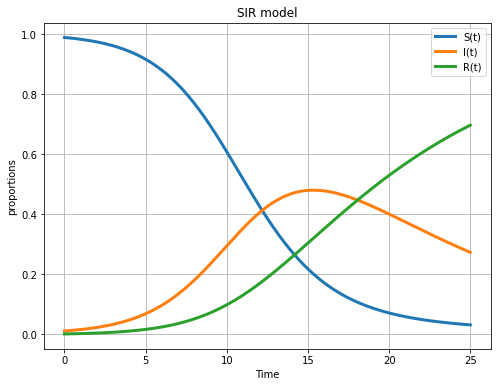

In [6]:
plotSIR(beta, gamma, maxT)